In [38]:
import fbprophet as Prophet
import yfinance as yf
import numpy as  np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime as dt

In [45]:
start=dt.datetime(2019,1,1)
end=dt.datetime(2021,8,25)

df = pdr.get_data_yahoo("NVDA", start, end)
df.reset_index(inplace=True,drop=False)
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-01-02,34.619999,32.512501,32.660000,34.055000,50875200.0,33.847198
1,2019-01-03,33.790001,31.922501,33.447498,31.997499,70555200.0,31.802248
2,2019-01-04,34.432499,32.424999,32.735001,34.047501,58562000.0,33.839737
3,2019-01-07,36.222500,34.107498,34.625000,35.849998,70916000.0,35.631237
4,2019-01-08,36.695000,34.224998,36.672501,34.957500,78601600.0,34.744186


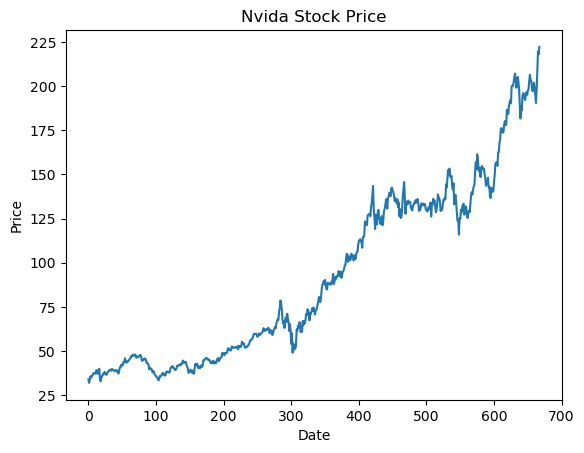

In [46]:
close = df['Close']
ax = close.plot(title="Nvida Stock Price")
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.show()

In [47]:
df["Date"]=pd.to_datetime(df["Date"],infer_datetime_format=True)
data = df[['Date','Close']]
data = data.rename(columns= {"Date":"ds","Close":"y"})

In [48]:
model = Prophet.Prophet()
model.fit(data)
pred = model.make_future_dataframe(periods=365)
forecast = model.predict(pred)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
1028,2022-08-21,338.448890,279.875507,398.935729
1029,2022-08-22,338.238149,278.903982,396.952417
1030,2022-08-23,339.206604,280.870680,399.297413
1031,2022-08-24,340.160418,281.474853,399.254675
1032,2022-08-25,341.023318,280.520507,400.049289


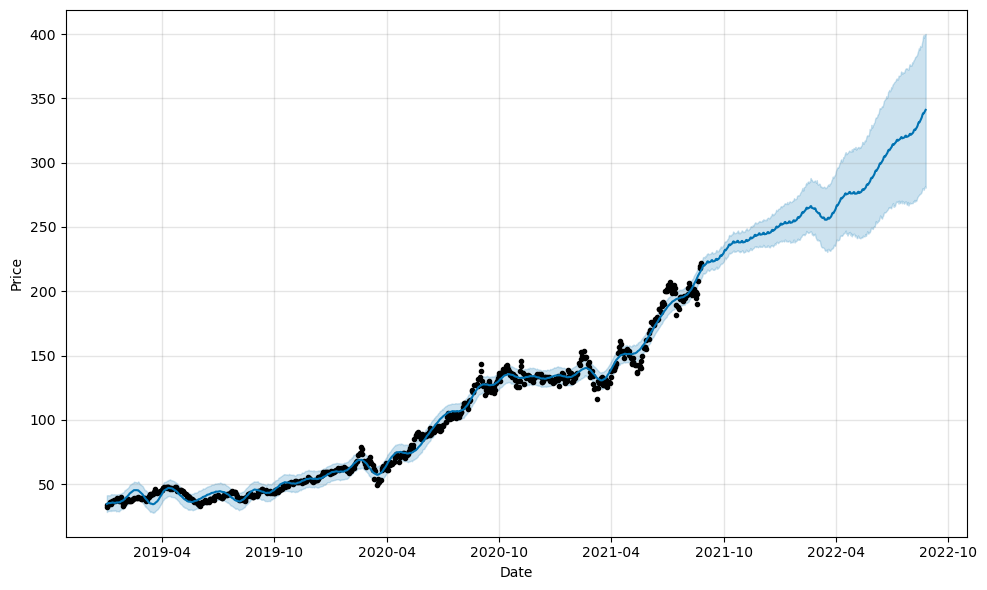

In [51]:
model.plot(forecast, xlabel="Date", ylabel="Price")
